In [66]:
!pip install face_recognition


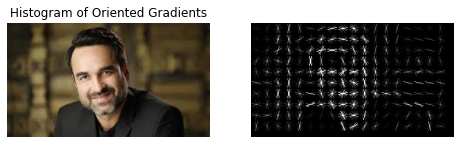

In [112]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data , exposure
import cv2


# Reading image from disk
image= cv2.imread('pankaj1.jpg')
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16,16),
                   cells_per_block=(1,1), visualize=True, multichannel=True)


#plot image and hog image

fig,(ax1,ax2)= plt.subplots(1,2,figsize=(8,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input Image')


hog_image_rescaled= exposure.rescale_intensity(hog_image, in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax1.set_title('Histogram of Oriented Gradients') 

plt.show()







In [113]:
import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle , Circle
import numpy as np
import cv2
%matplotlib inline




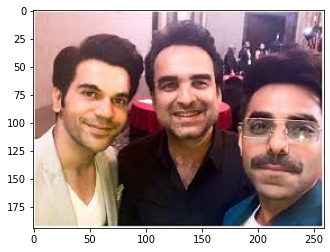

In [114]:
image=cv2.imread('pankaj rajkumar 1.jpg')
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [115]:
face_locations=face_recognition.face_locations(image)
number_of_faces=len(face_locations)
print("found {} face(s) in input image.".format(number_of_faces))


found 3 face(s) in input image.


A face is located at pixel location Top:31,Left:53, Bottom:93, Right:115
A face is located at pixel location Top:175,Left:76, Bottom:259, Right:166
A face is located at pixel location Top:96,Left:47, Bottom:171, Right:121


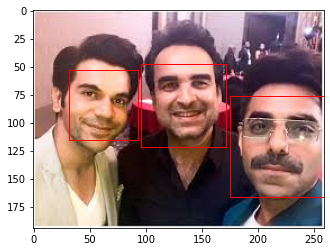

In [116]:
plt.imshow(image)
ax=plt.gca()

for face_location in face_locations:
    top,right,bottom,left=face_location
    x,y,w,h=left,top,right,bottom
    print('A face is located at pixel location Top:{},Left:{}, Bottom:{}, Right:{}'.format(x,y,w,h))
    
    
    rect=Rectangle((x,y),w-x,h-y,fill=False,color='red')
    ax.add_patch(rect)
    

plt.show()    

In [117]:
import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle , Circle
import numpy as np
import cv2
%matplotlib inline 

In [118]:
#loading images

image=cv2.imread('face demo.jpg')
face_demo=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image=cv2.imread('pankaj1.jpg')
pankaj=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image=cv2.imread('rajkumar1.jpg')
rajkumar=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)





In [119]:
#Face encoding
face_demo_encoding= face_recognition.face_encodings(face_demo)[0]
pankaj_encoding=face_recognition.face_encodings(pankaj)[0]
rajkumar_encoding=face_recognition.face_encodings(rajkumar)[0]


known_face_encodings=[
    face_demo_encoding,
    pankaj_encoding,
    rajkumar_encoding
]





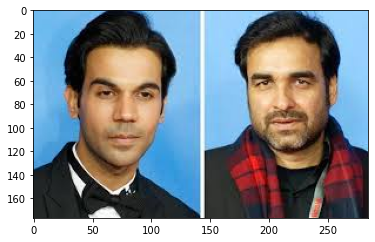

In [120]:
image=cv2.imread('pankaj rajkumar.jpg')
unknown_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)


unknown_face_encodings=face_recognition.face_encodings(unknown_image)  

In [121]:
from scipy.spatial import distance

for unknown_face_encoding in unknown_face_encodings:
    
    

    results=[]
    for known_face_encoding in known_face_encodings:
        d=distance.euclidean(known_face_encoding,unknown_face_encoding)
        results.append(d)
        
    threshold=0.6
    results=np.array(results) <= threshold
    
    name='Unknown'
    
    
    if results[0]:
        name="Face demo image"
    elif results[1]:
        name="Pankaj Tripathi"
    elif results[2]:
        name="Rajkumar Rao"
        
    print(f"Found {name} in the photo")
        
        
        

Found Pankaj Tripathi in the photo
Found Rajkumar Rao in the photo
